<a href="https://colab.research.google.com/github/3DLables/3DLabeler/blob/master/MouseSkullKPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mouse Skull Model
## Purpose:
To design a machine learning algorithm that is able to predict the postion of 5
key points on 3D mouse skulls. 

This will help with the preprocessing step of genomic modeling mouse skulls.

In [1]:
import numpy as np
from tqdm import tqdm
import os
from google.colab import drive
from scipy.ndimage import rotate
drive.mount('/drive')
%cd /drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive
/drive


Part of our preprocessing step was to create a python library that could
manipulate the images of the mouse skulls and the key points on them to the same
size and shape. This can be installed on any system with python 3.5+ with the
following command:

In [4]:
!pip install  https://github.com/3DLables/3DLabeler/archive/master.zip  
# Installs latest pip package

     | 1.6MB 2.8MB/s
  Created wheel for ThreeDLabeler: filename=ThreeDLabeler-0.1.2-cp36-none-any.whl size=6374 sha256=d2fe0ef74d4e19dee529e10c7ed9f289288b0af31d4d944b37686ab010a3dec6
  Stored in directory: /tmp/pip-ephem-wheel-cache-weokydbo/wheels/bf/17/fd/9bff15b364a3701f9ade6d41f38213bcefaf5dd3e2885a6d1c
Successfully built ThreeDLabeler


Next we must import the library.

In [0]:
import ThreeDLabeler as td

In [0]:
basepath = '/drive/My Drive/Colab Notebooks/MouseSkulls/ReducedData/'
file_list = os.listdir(basepath)

In [7]:
skulls = []
points = []
for file in tqdm(file_list):
    file = np.load(basepath+file, allow_pickle=True)
    skulls.append(file[0])
    points.append(file[1])

100%|██████████| 218/218 [03:04<00:00,  1.28it/s]


In [0]:
skulls = np.array(skulls)

In [9]:
skulls.shape

(218, 128, 128, 128)

In [0]:
points = np.array(points)

In [11]:
points.shape

(218, 5, 3)

In [12]:
points[0]

array([[88.56115657, 52.51716346, 75.00089989],
       [70.20762833, 76.5855448 , 40.93514299],
       [51.88923916, 61.57721341,  1.75809896],
       [52.50764401, 82.42493911, 42.83472686],
       [29.59174929, 69.83438541, 78.80672787]])

## Plotting the Skulls
Here we see the key points plotted on a $128^3$ skull. This image looks clear
but unfortunetly crashes the TPU on our Google Colab instance. So we have to
bring down the size to let us hold everything in memory.

In [0]:
img = td.Image(skulls[0], points[0])

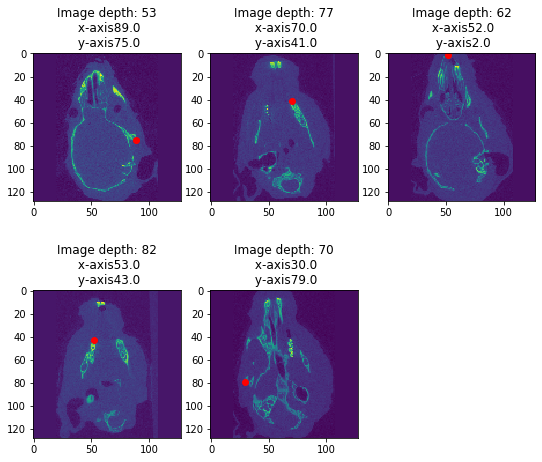

In [19]:
img.plot()

Unfortunetly these images are still too big for our algorimth.

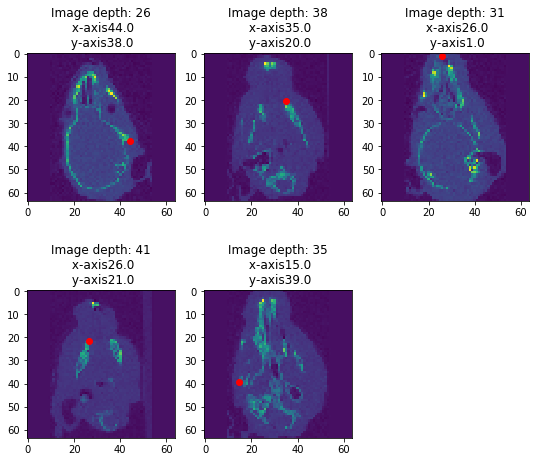

In [21]:
td.Image(skulls[0], point_position=points[0]).scale(64).plot()

While this does not look as clear, it will fit a lot better in our training mode.

We convert the entire list to the $64^3$ size by again converting them to
our `Image` class.

In [42]:
im64 = []

for i in tqdm(range(skulls.shape[0])):
    im = td.Image(skulls[i], 1, points[i])
    im = im.scale(64)
    im64.append(im)

100%|██████████| 218/218 [00:40<00:00,  5.35it/s]


In [43]:
type(im64)

list

In [0]:
from random import shuffle

shuffle(im64)

In [0]:
train_im = im64[:152]
test_im = im64[152:196]
crossval_im = im64[196:]

In [0]:
skulls64 = np.array(skulls64)
points64 = np.array(points64)

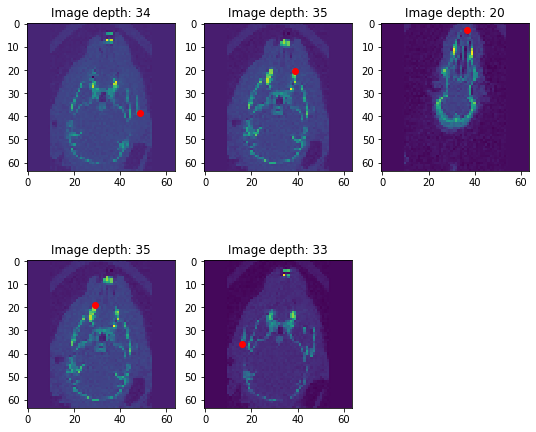

In [0]:
td.Image(skulls64[3], 1, points64[3]).plot()

## Reshapoing the files
Because we have limited mouse skulls, we need to rotate them to artificially increase the number of images that we have to feed the neural network.

It is critical that we do our train test split before this happens but for
illustrative purposes I will do this after I ensure that the code works.



In [0]:
im = td.Image(skulls[0], (1, 1, 1), point_position=points[0])


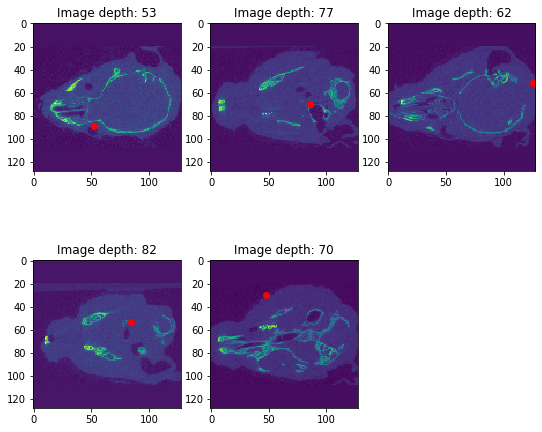

In [0]:
im.rotator(90, (0, 2)).plot()

In [0]:
skulls64 = skulls64.reshape(218, 64, 64, 64, 1)

In [0]:
points64 = points64.reshape(218, 15)

In [0]:
s = skulls[0]
s90 = rotate(s, 90, (0,2))
s180 = rotate(s, 180, (0,2))
s270 = rotate(s, 270, (0,2))
kp = points[0]
kp90 = np.array([[i[2], i[1], 128-i[0]] for i in kp])
kp180 = np.array([[i[2], i[1], 128-i[0]] for i in kp90])
kp270 = np.array([[i[2], i[1], 128-i[0]] for i in kp180])


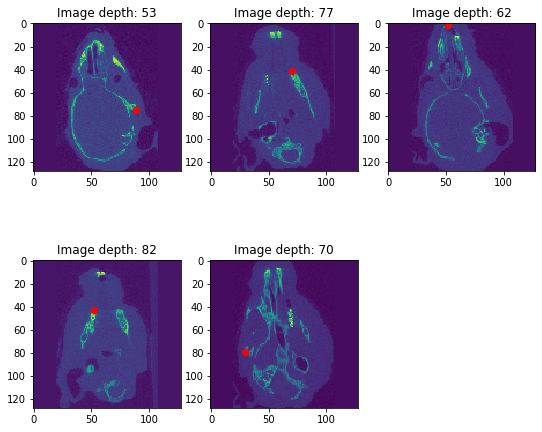

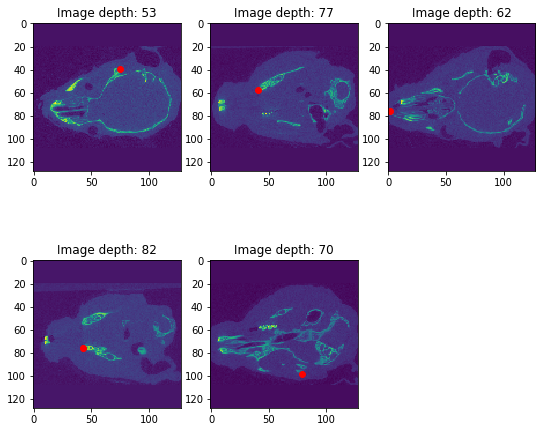

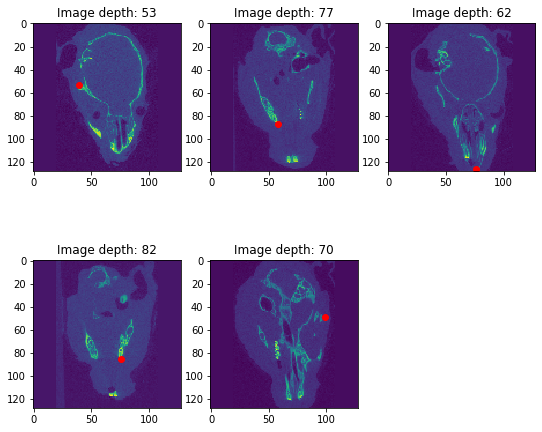

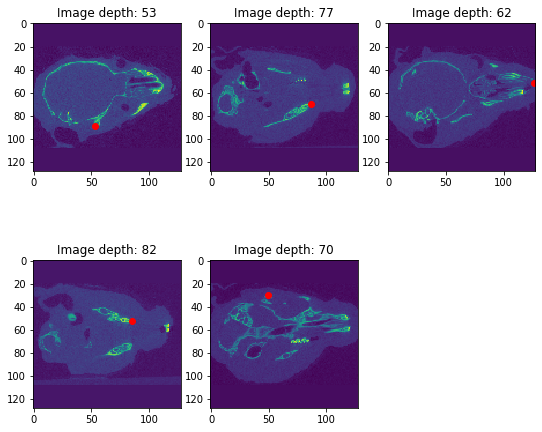

In [0]:
td.mri_plot(s, kp, vcol=1)
td.mri_plot(s90, kp90, vcol=1)
td.mri_plot(s180, kp180, vcol=1)
td.mri_plot(s270, kp270, vcol=1)

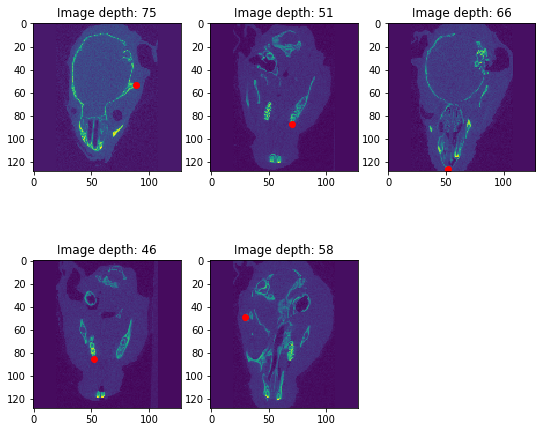

In [0]:
s = skulls[0]
s90  = rotate(s, 90,  (0,1))
s180 = rotate(s, 180, (0,1))
s270 = rotate(s, 270, (0,1))
kp = points[0]
kp90 = np.array([[i[0], i[2], 128-i[1]] for i in kp])
kp180 = np.array([[i[0], i[2], 128-i[1]] for i in kp90])
p270 = np.array([[i[0], i[2], 128-i[1]] for i in kp180])

#td.mri_plot(s, kp, vcol=1)
#td.mri_plot(s90, kp90, vcol=1)
td.mri_plot(s180, kp180, vcol=1)
#td.mri_plot(s270, kp270, vcol=1)

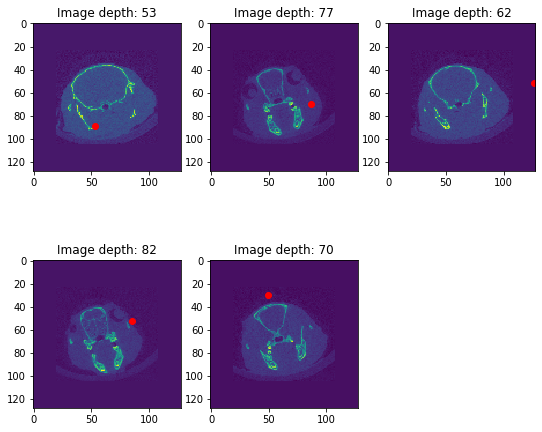

In [0]:
s = skulls[0]
s90  = rotate(s, 90,  (0,1))
s180 = rotate(s, 180, (0,1))
s270 = rotate(s, 270, (0,1))
kp = points[0]

a, b, c = (0, 2, 1)
kp90 = np.array([[i[a], i[b], 128-i[c]] for i in kp])
kp180 = np.array([[i[a], i[b], 128-i[c]] for i in kp90])
p270 = np.array([[i[a], i[b], 128-i[c]] for i in kp180])


#td.mri_plot(s, kp, vcol=1)
#td.mri_plot(s90, kp90, vcol=2)
#td.mri_plot(s180, kp180, vcol=1)
td.mri_plot(s270, kp270, vcol=1)

In [0]:
%tensorflow_version 2.x # in order to have tf and reduce warnings.

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x # in order to have tf and reduce warnings.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv3D, Flatten, Dropout, Dense
from tensorflow.keras.layers import BatchNormalization, MaxPool3D, LeakyReLU


## Modeling:
Here we have a baisic model implemnetend in `TensorFlow 2.0`

In [0]:
model = tf.keras.Sequential()

model.add(Conv3D(32, (3, 3, 3), padding='same', use_bias=False, 
                 input_shape=(64, 64, 64, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())


model.add(Conv3D(32, (3, 3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool3D())

model.add(Conv3D(64, (3, 3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool3D())

model.add(Flatten())
model.add(Dense(64, activation='relu', ))
model.add(Dropout(0.1))
model.add(Dense(15))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 64, 64, 64, 32)    864       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 64, 32)    0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64, 32)    128       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 64, 64, 64, 32)    27648     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 64, 32)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64, 32)    128       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 32, 32, 32, 32)    0

In [0]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae'])

In [0]:
model.fit(skulls64, points64, epochs=100, batch_size=8)


Train on 218 samples
Epoch 1/100
218/218 [==============================] - 5s 24ms/sample - loss: 182.0068 - mae: 10.3118
Epoch 2/100
218/218 [==============================] - 5s 24ms/sample - loss: 233.5489 - mae: 11.7390
Epoch 3/100
218/218 [==============================] - 5s 24ms/sample - loss: 227.4213 - mae: 11.3955
Epoch 4/100
218/218 [==============================] - 5s 24ms/sample - loss: 244.4328 - mae: 11.8197
Epoch 5/100
218/218 [==============================] - 5s 24ms/sample - loss: 235.8907 - mae: 11.3512
Epoch 6/100
218/218 [==============================] - 5s 24ms/sample - loss: 176.9620 - mae: 10.1620
Epoch 7/100
218/218 [==============================] - 5s 24ms/sample - loss: 225.1095 - mae: 11.2825
Epoch 8/100
218/218 [==============================] - 5s 24ms/sample - loss: 168.0684 - mae: 9.9536
Epoch 9/100
218/218 [==============================] - 5s 24ms/sample - loss: 186.2715 - mae: 10.0952
Epoch 10/100
218/218 [==============================] - 5s 24m

In [0]:
preds1 = model.predict(skulls64)

## Results
Here are he predictions.

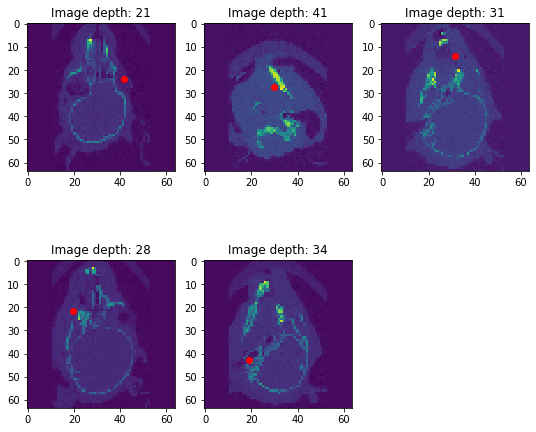

In [0]:
preds1 = preds1.reshape(218, 5, 3)

td.Image(skulls64.reshape(218, 64, 64, 64)[1], 1, point_position=preds1[1]).plot()

And the actuals:


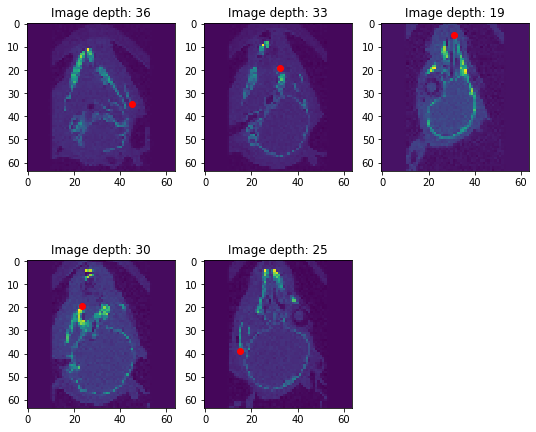

In [0]:
td.Image(skulls64.reshape(218, 64, 64, 64)[1], 1, point_position=points64.reshape(218, 5, 3)[1]).plot()

## Results Analysis:
So far these are pretty poor. However given that we only have 221 skulls and
that we haven't manipulated them to increase that number or increased the
number of training epochs we are pretty confident that we can get far better 
results. 